In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')


In [39]:
df = pd.read_csv('datasales_data.csv')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [41]:
df.shape
df.columns
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

,Row ID,Postal Code,Quantity,Discount,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


In [43]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [47]:
df['Sales'] = df['Sales'].replace(r'[$,]', '', regex=True).astype(float)
df['Profit'] = df['Profit'].replace(r'[$,]', '', regex=True).astype(float)


In [49]:
df.isnull().sum()


Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [51]:
df['Postal Code'].fillna(0, inplace=True)


C:\Users\Shrawani\AppData\Local\Temp\ipykernel_24016\1975537569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(0, inplace=True)


In [53]:
df.drop_duplicates(inplace=True)


In [55]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month Name'] = df['Order Date'].dt.month_name()


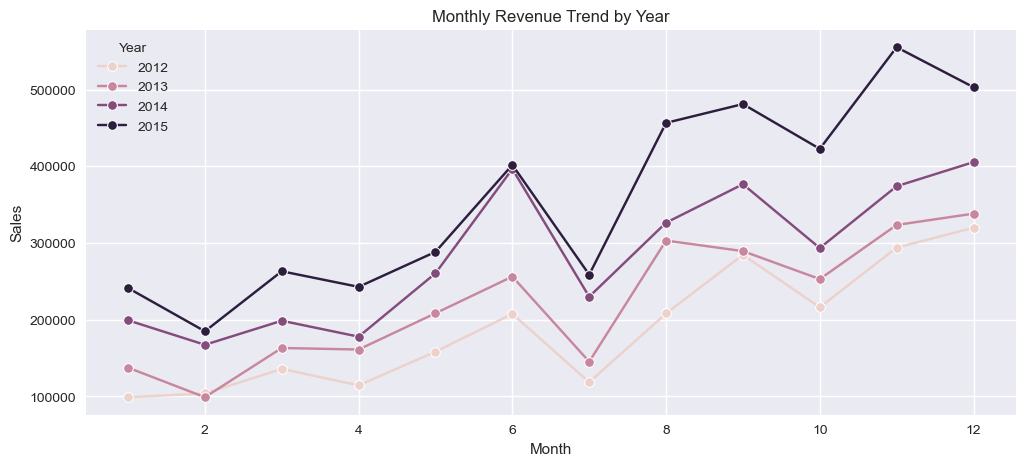

In [57]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Monthly Revenue Trend by Year')
plt.ylabel('Sales')
plt.show()


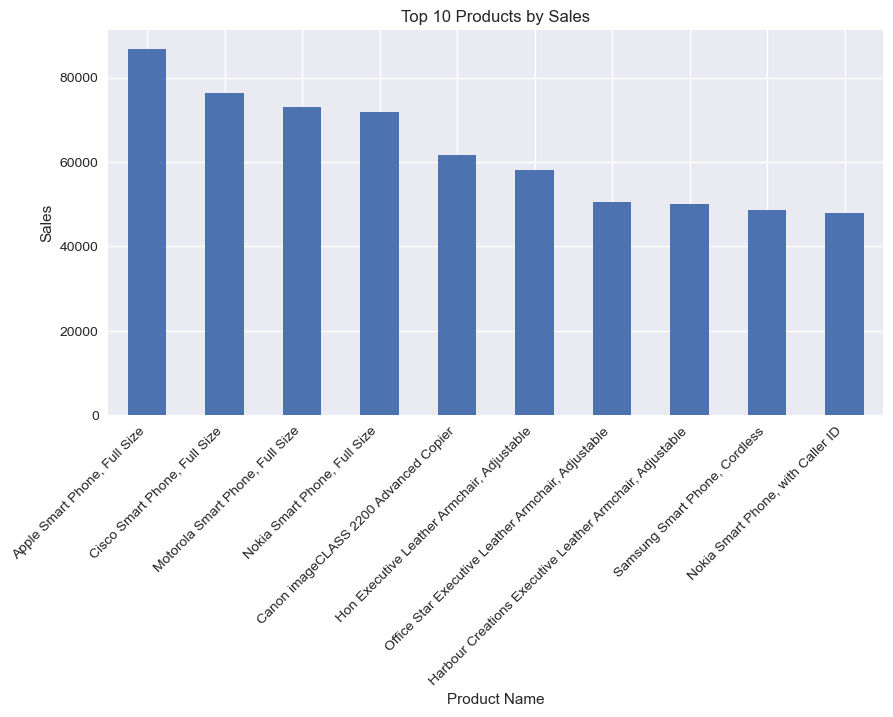

In [59]:
top_products = (
    df.groupby('Product Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.show()


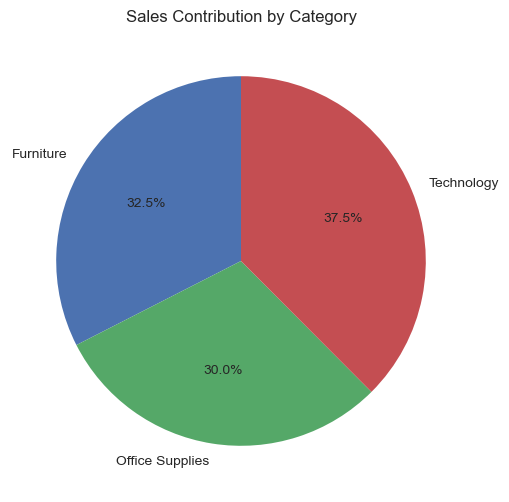

In [61]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(6,6))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Contribution by Category')
plt.ylabel('')
plt.show()


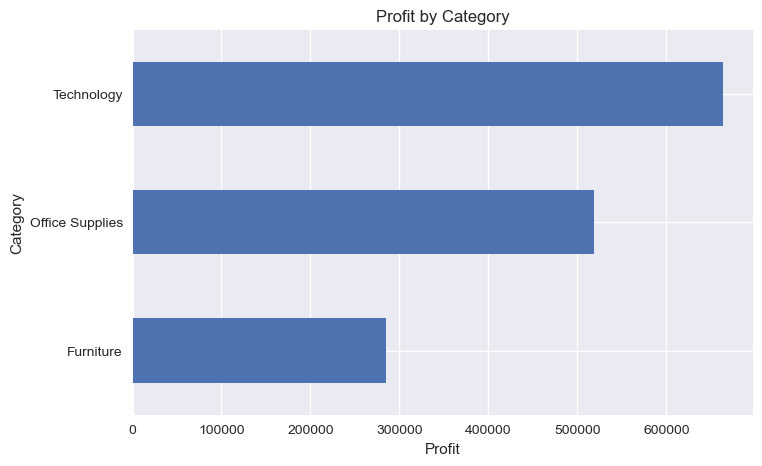

In [63]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values()

plt.figure(figsize=(8,5))
category_profit.plot(kind='barh')
plt.title('Profit by Category')
plt.xlabel('Profit')
plt.show()


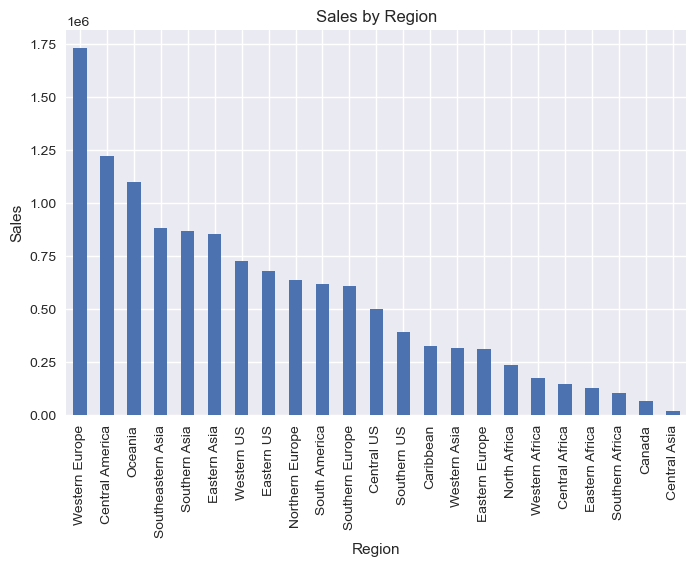

In [65]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.show()


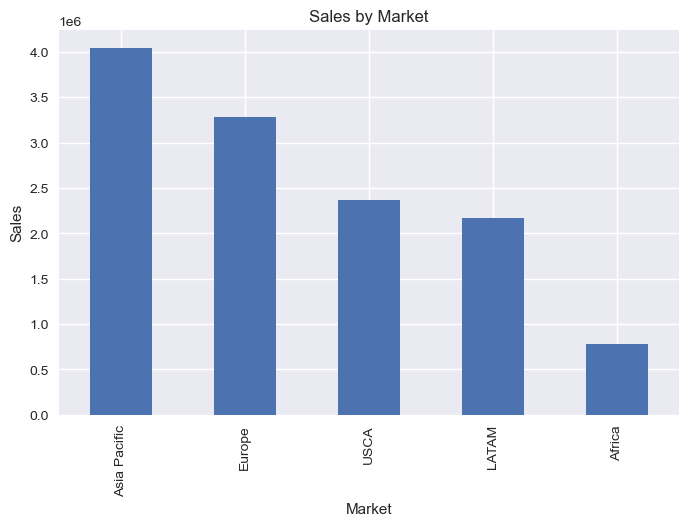

In [67]:
market_sales = df.groupby('Market')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
market_sales.plot(kind='bar')
plt.title('Sales by Market')
plt.ylabel('Sales')
plt.show()


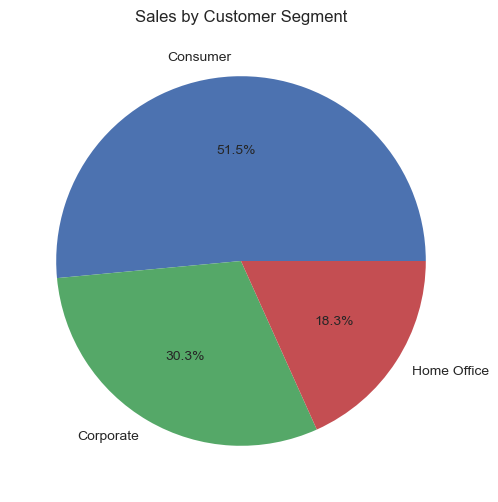

In [69]:
segment_sales = df.groupby('Segment')['Sales'].sum()

plt.figure(figsize=(6,6))
segment_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Customer Segment')
plt.ylabel('')
plt.show()


In [71]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
avg_order_value = total_sales / total_orders

total_sales, total_profit, total_orders, avg_order_value


(12642507.250000004, 1467456.66, 25728, 491.3909845304728)

In [77]:
df.to_csv('cleaned_sales_data.csv', index=False)
